In [1]:
import pandas as pd
import numpy as np
import csv
import os
from datetime import datetime
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
#Activate the first option if whole column width is necessary and the second to make all columns visible
#pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', 999)

## I. Import the processed dataset

In [37]:
#Get the report and store it into a dataframe. Check what columns are included in the file
report = pd.read_csv('Historical_Gritting_Data_2007_2020_Final_Consolidate.csv', index_col = 0, parse_dates=True)
print(report.columns)
print(report.shape)
print(report.dtypes)

Index(['Salt 30 gr', 'Salt 15 gr', 'Salt 8 gr'], dtype='object')
(4894, 3)
Salt 30 gr    float64
Salt 15 gr    float64
Salt 8 gr     float64
dtype: object


In [38]:
report.head(5)

,Salt 30 gr,Salt 15 gr,Salt 8 gr
Date,,,
2006-10-06,NaN,NaN,NaN
2006-10-07,NaN,NaN,NaN
2006-10-08,NaN,NaN,NaN
2006-10-09,NaN,NaN,NaN
2006-10-10,NaN,NaN,NaN


In [39]:
report.describe()

,Salt 30 gr,Salt 15 gr,Salt 8 gr
count,5.0,327.000000,263.000000
mean,1.0,1.305810,1.045627
std,0.0,0.653961,0.226595
min,1.0,1.000000,1.000000
25%,1.0,1.000000,1.000000
50%,1.0,1.000000,1.000000
75%,1.0,1.000000,1.000000
max,1.0,5.000000,3.000000


In [35]:
#pd.to_datetime(report['Date'])


0      2006-10-06
1      2006-10-07
2      2006-10-08
3      2006-10-09
4      2006-10-10
          ...    
4889   2020-02-24
4890   2020-02-25
4891   2020-02-26
4892   2020-02-27
4893   2020-02-28
Name: Date, Length: 4894, dtype: datetime64[ns]

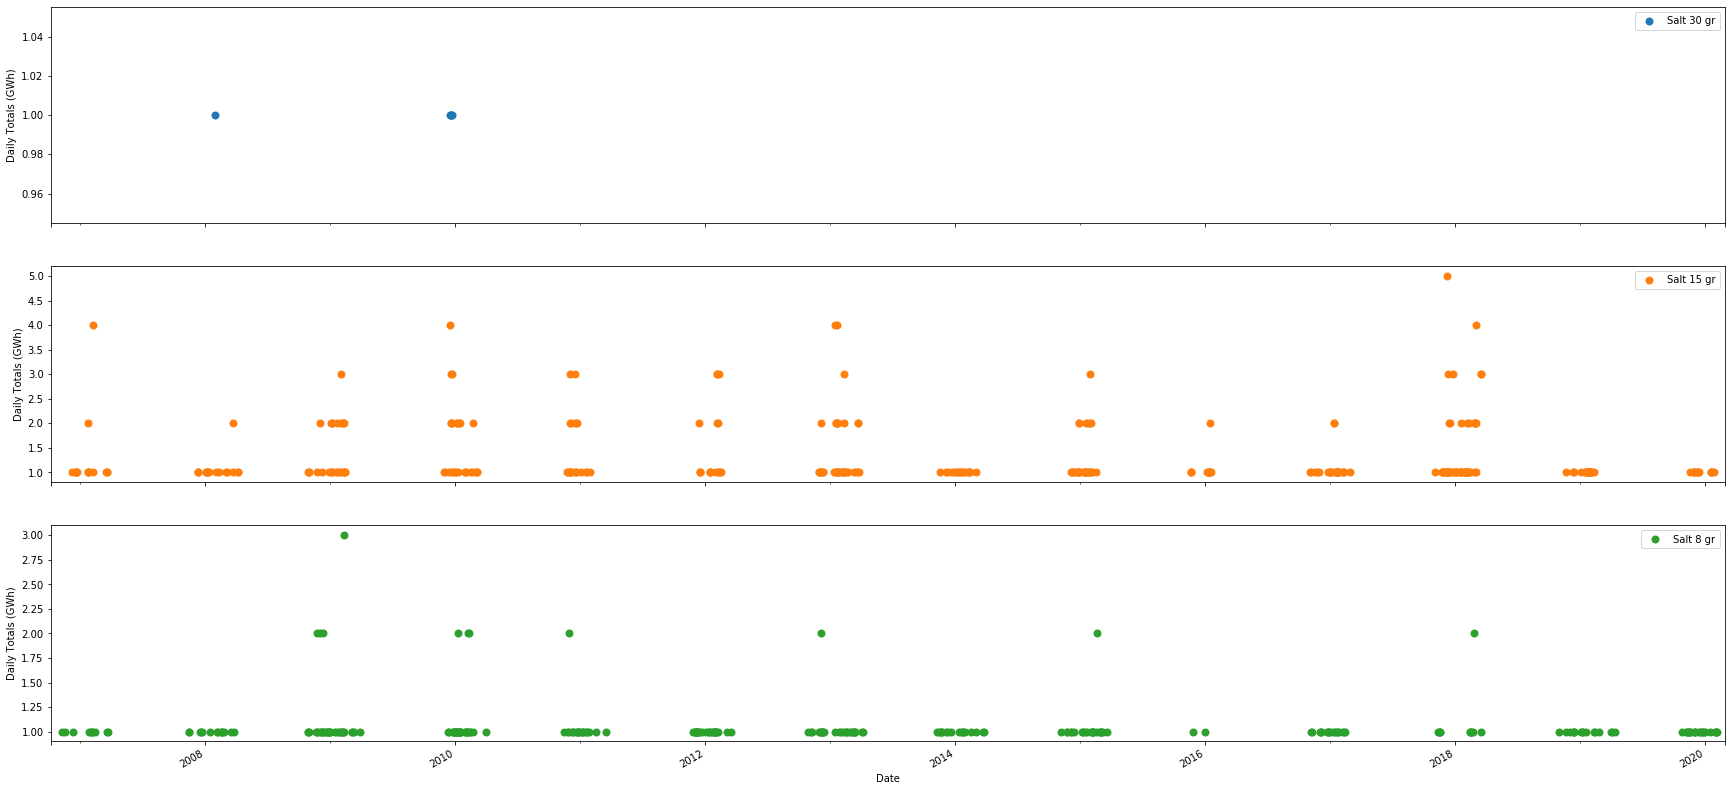

In [40]:
cols_plot = ['Salt 30 gr', 'Salt 15 gr', 'Salt 8 gr']
axes = report[cols_plot].plot(marker='.', mew = 5, alpha=2, linestyle='None', figsize=(30, 15), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Totals (GWh)')

In [44]:
#report['Year'] = report.index.year
analysis = report.groupby(['Year']).agg({'Salt 8 gr': ['count'],'Salt 15 gr': ['count'],'Salt 30 gr': ['count'] })
analysis
#df['percentile'] = df.groupby(df.index)['ratio_cost'].rank(pct=True)

,Salt 8 gr,Salt 15 gr,Salt 30 gr
,count,count,count
Year,,,
2006,3,5,0
2007,12,12,0
2008,28,20,1
2009,20,32,4
2010,34,31,0
2011,20,8,0
2012,24,21,0
2013,23,33,0
